# Census Income Project
### Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



### Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Loading Database
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
df.shape

(32560, 15)

there is 32560 Rows and 15 Columns


In [6]:
#checking null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

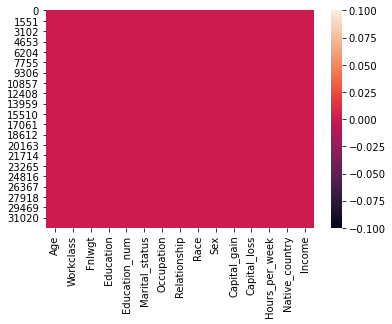

In [7]:
sns.heatmap(df.isnull())

 there is no null values in database


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.6+ MB


Here we found two type of Datatype. 6 columns have int64 type dt and 9 columns have object type dt.


In [9]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [10]:
# Statical Description of database
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


1- we seen in above observation there is too much deviation in std we will handdle it latter

2-Min age is 17 , max age is 90 , and avg age is 38

3- Min Hours_per_week is 1, max Hours_per_week is 99 , avg Hours_per_week is 40

In [11]:
df['Income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [12]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In Target columns we found two type of data 

In [13]:
df['Age'].unique()

array([50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43, 54,
       35, 59, 56, 19, 39, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [14]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Workclass Columns contain 1836 -'?' symbols.

In [15]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

In [16]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [17]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

Occupation Columns contain 1843 -'?' symbols.

In [18]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

In [19]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

In [20]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

In [21]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Native Country Columns contain 583 -'?' symbols.


Based on above observation only three columns Workclass,Occupation,and Native_country have '?' values which needs to be preprocessed later.


### Exploratory Data Analysis(EDA)

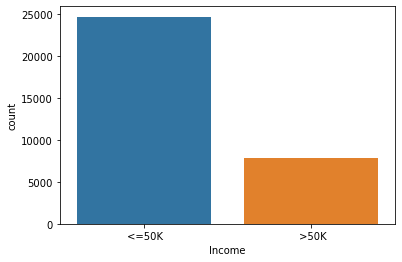

In [22]:
#Target Variable data visualization
sns.countplot(x='Income',data=df)
plt.show()

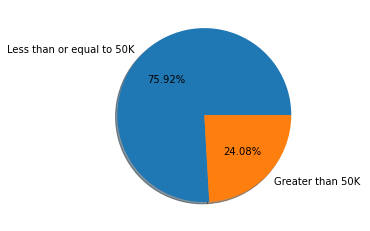

In [23]:
# Pie chart for Dependent variable
labels='Less than or equal to 50K','Greater than 50K '
fig,ax=plt.subplots()
ax.pie(df['Income'].value_counts(),labels=labels,autopct='%1.2f%%',shadow=True)
plt.show()

The dataset is imbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.We will need to handle it later.

Text(0, 0.5, 'Number of people')

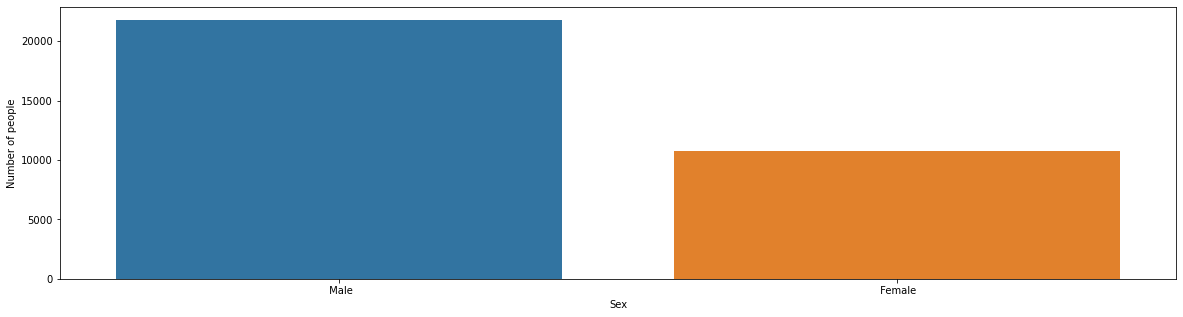

In [24]:
plt.figure(figsize=(20,5))
sns.countplot(df['Sex'])
plt.ylabel("Number of people")

Male Contributes more compare to Female

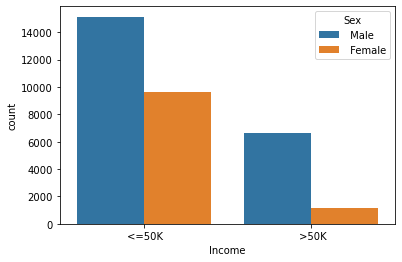

In [25]:
sns.countplot(x='Income',hue='Sex',data=df)
plt.show()

Male Income more compare to Female

Text(0, 0.5, 'Number of people')

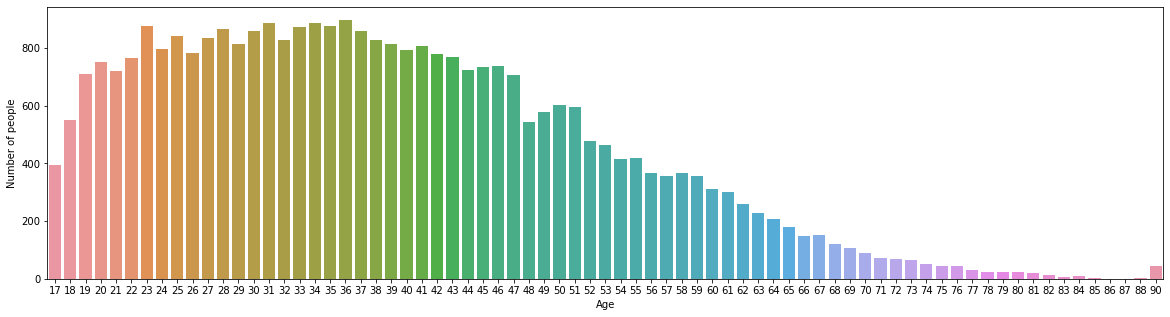

In [26]:
plt.figure(figsize=(20,5))
sns.countplot(df['Age'])
plt.ylabel("Number of people")

Most of the people belongs age 20 to 50


Text(0, 0.5, 'Average Age')

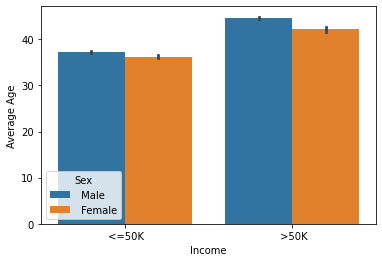

In [27]:
ax = sns.barplot(data = df, x = 'Income', y = 'Age', hue = 'Sex')
plt.ylabel("Average Age")

People with >50K has a higher average age than the ones with <=50K. And in both cases of income, we see that the male category has a little bit greater age average than the female category.

Text(0, 0.5, 'Number of people')

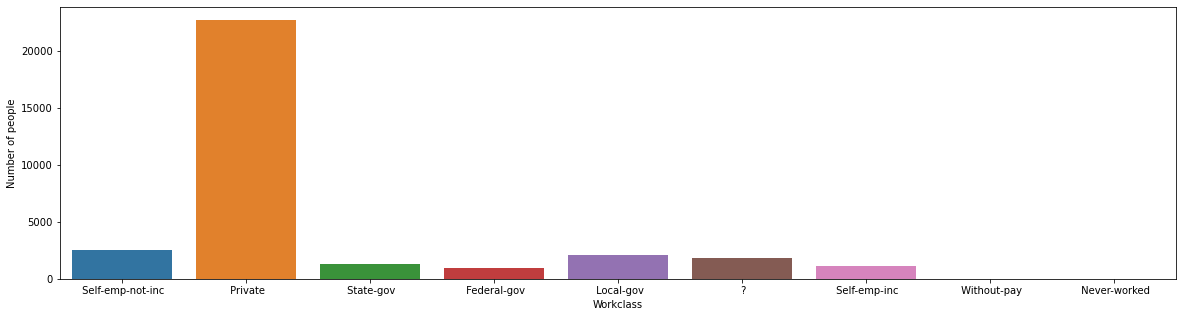

In [28]:
plt.figure(figsize=(20,5))
sns.countplot(df['Workclass'])
plt.ylabel("Number of people")

Most of people belongs to Private sector

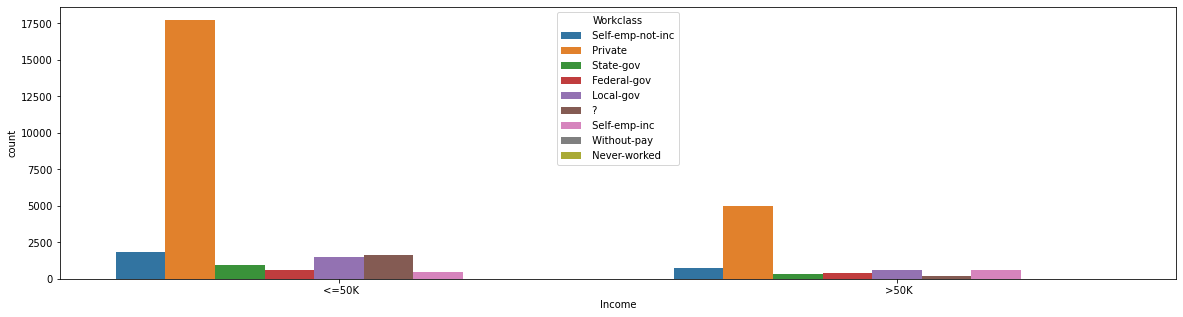

In [29]:
plt.figure(figsize=(20,5))
sns.countplot(x='Income',hue='Workclass',data=df)
plt.show()

Most of People belongs to privane sector and their income is <=50k

Text(0, 0.5, 'Number of people')

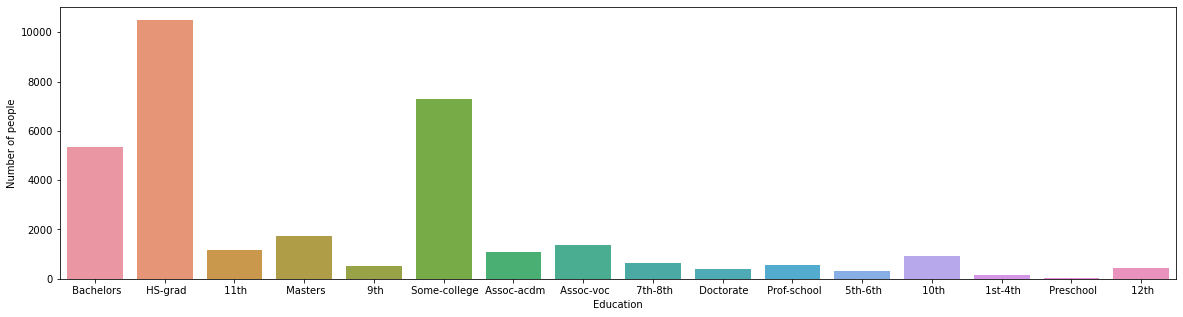

In [30]:
plt.figure(figsize=(20,5))
sns.countplot(df['Education'])
plt.ylabel("Number of people")

Most of people has HS-grad after that Some-college

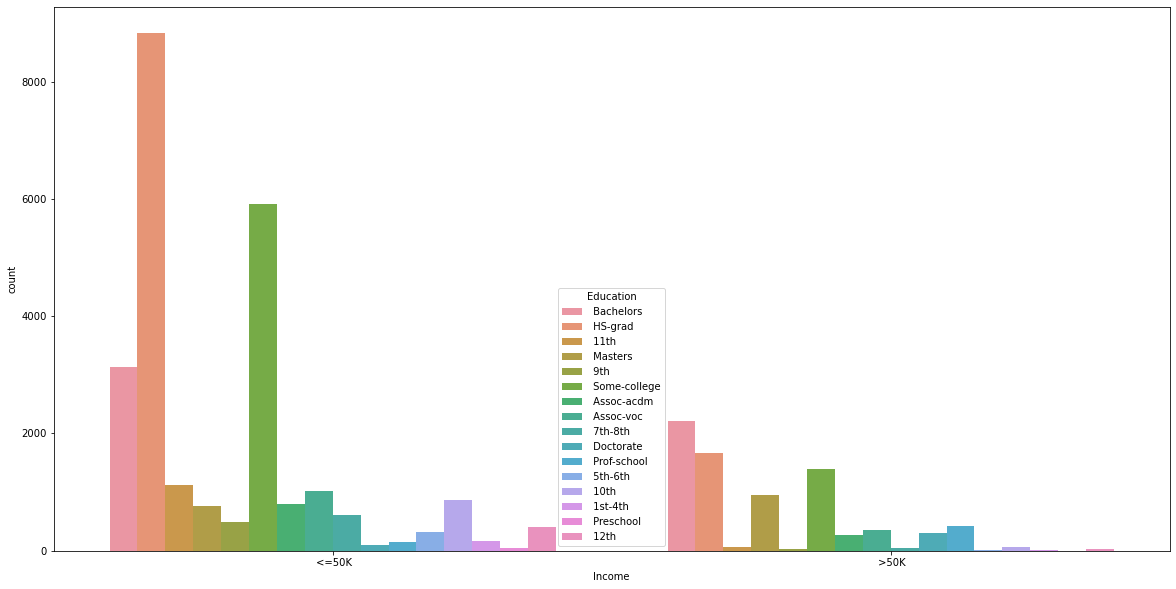

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(x='Income',hue='Education',data=df)
plt.show()

Most of pepople is HS-grad and their income is <=50k

Text(0, 0.5, 'Number of people')

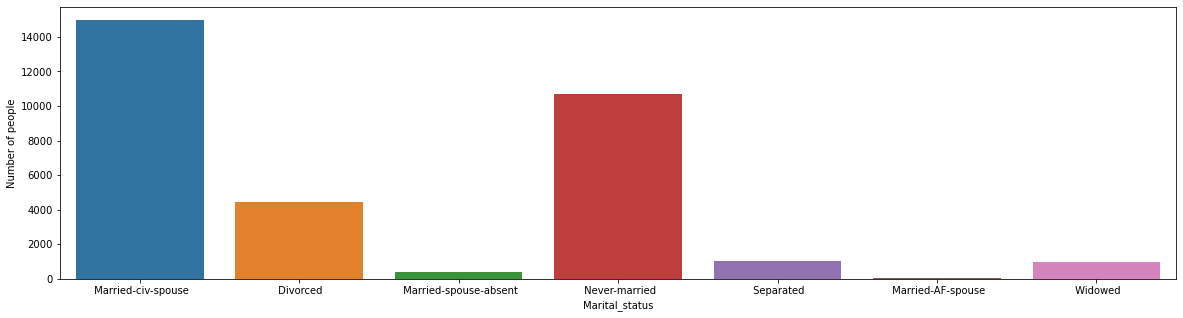

In [32]:
plt.figure(figsize=(20,5))
sns.countplot(df['Marital_status'])
plt.ylabel("Number of people")

Most of pepole is Married-civ-spouse after that Never-Married and Married-AF-spouse is very less

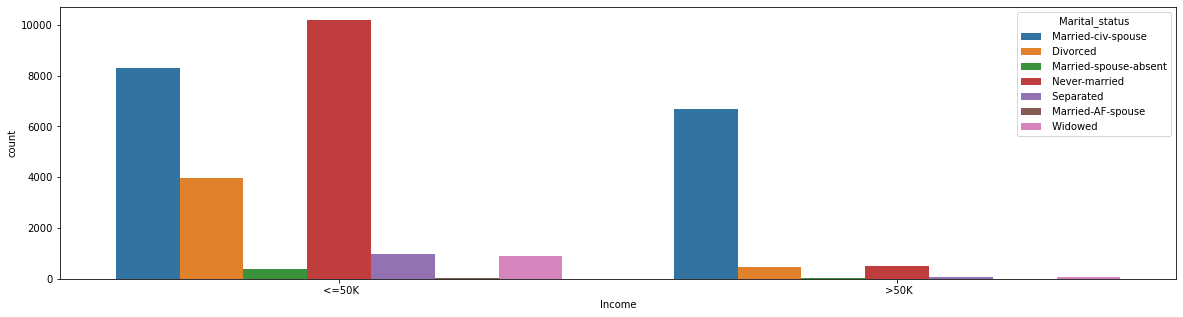

In [33]:
plt.figure(figsize=(20,5))
sns.countplot(x='Income',hue='Marital_status',data=df)
plt.show()

Never-married people is very high and their income is <=50k

Text(0, 0.5, 'Number of people')

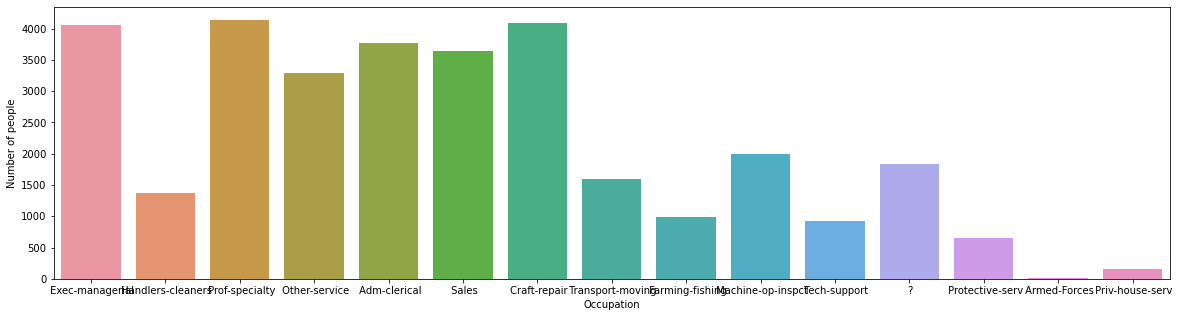

In [34]:
plt.figure(figsize=(20,5))
sns.countplot(df['Occupation'])
plt.ylabel("Number of people")

Prof-specialty Occupation is very high after that Craft-repair Occupation and Armed-Forces Occupation is very less.

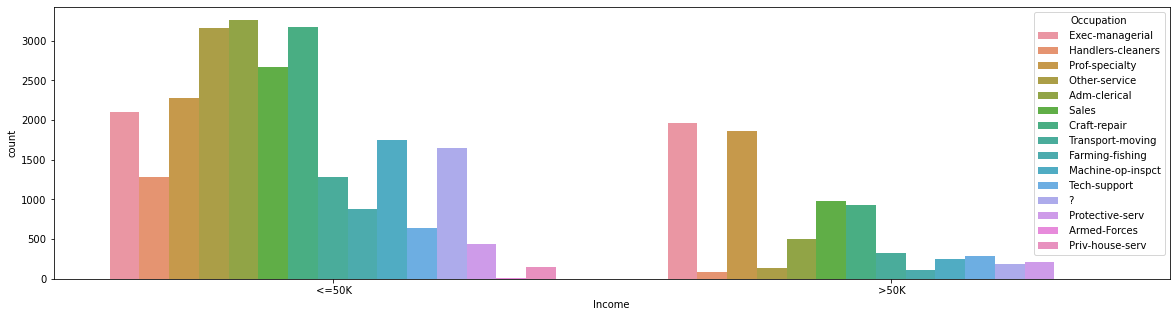

In [35]:
plt.figure(figsize=(20,5))
sns.countplot(x='Income',hue='Occupation',data=df)
plt.show()

Adm-clerical Occupation is very high and their income is <=50k

Text(0, 0.5, 'Number of people')

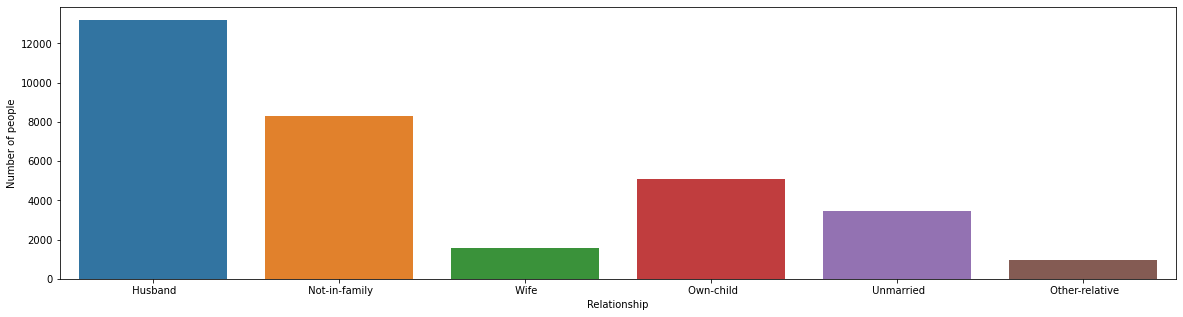

In [36]:
plt.figure(figsize=(20,5))
sns.countplot(df['Relationship'])
plt.ylabel("Number of people")

Most of People is Husband

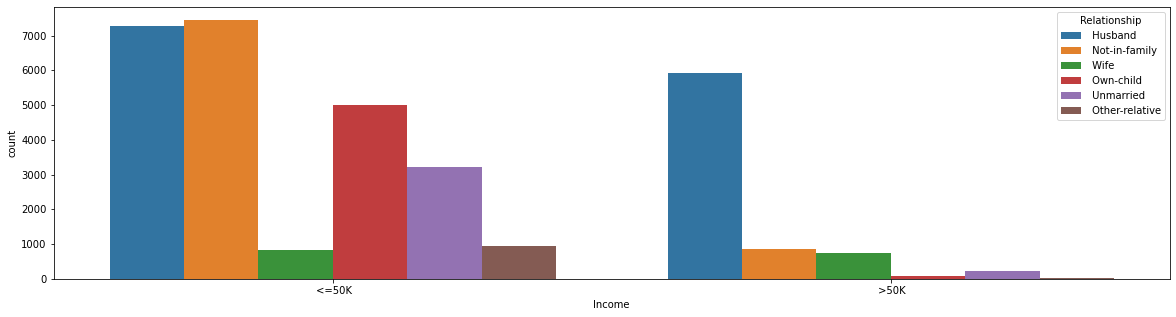

In [37]:
plt.figure(figsize=(20,5))
sns.countplot(x='Income',hue='Relationship',data=df)
plt.show()

Not-in Family Members is very high and their income is <=50k


Text(0, 0.5, 'Number of people')

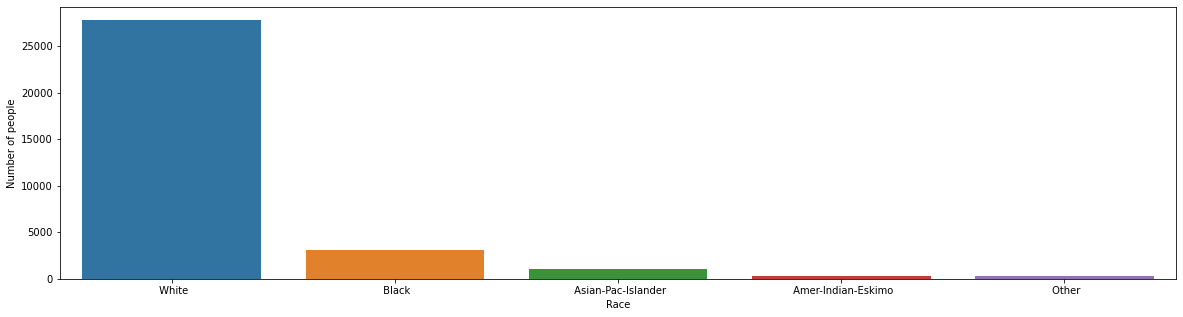

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(df['Race'])
plt.ylabel("Number of people")

Most Of the people belongs White 

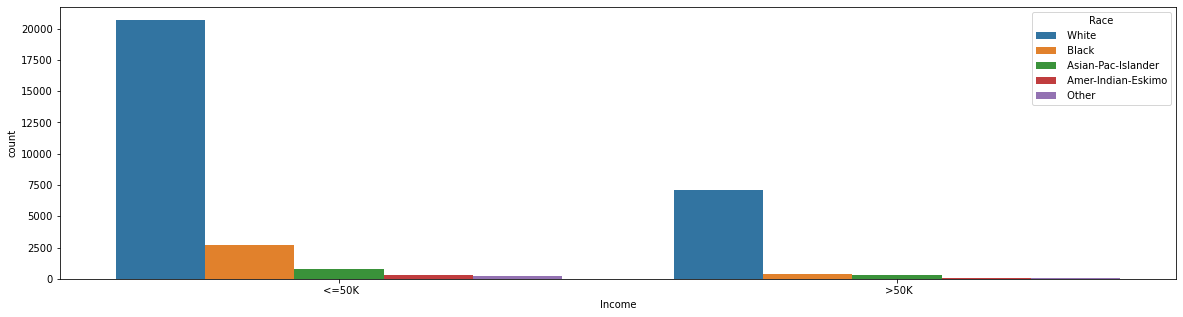

In [39]:
plt.figure(figsize=(20,5))
sns.countplot(x='Income',hue='Race',data=df)
plt.show()

Most of the people belongs white and their income is <=50k

Text(0, 0.5, 'Number of people')

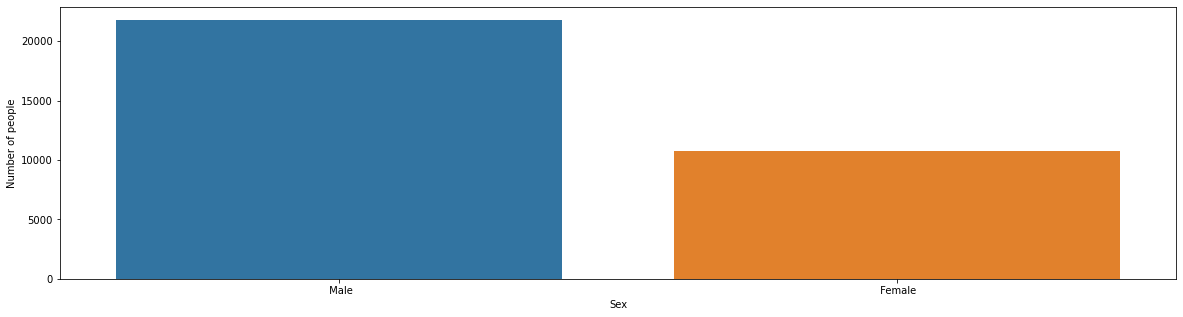

In [40]:
plt.figure(figsize=(20,5))
sns.countplot(df['Sex'])
plt.ylabel("Number of people")

Male Population is very high compare to Female

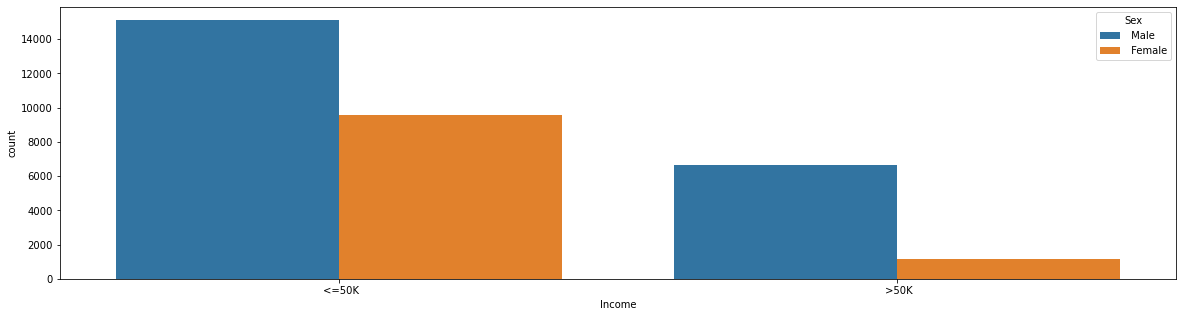

In [41]:
plt.figure(figsize=(20,5))
sns.countplot(x='Income',hue='Sex',data=df)
plt.show()

Most of people is male and their income is <=50k

Text(0, 0.5, 'Number of people')

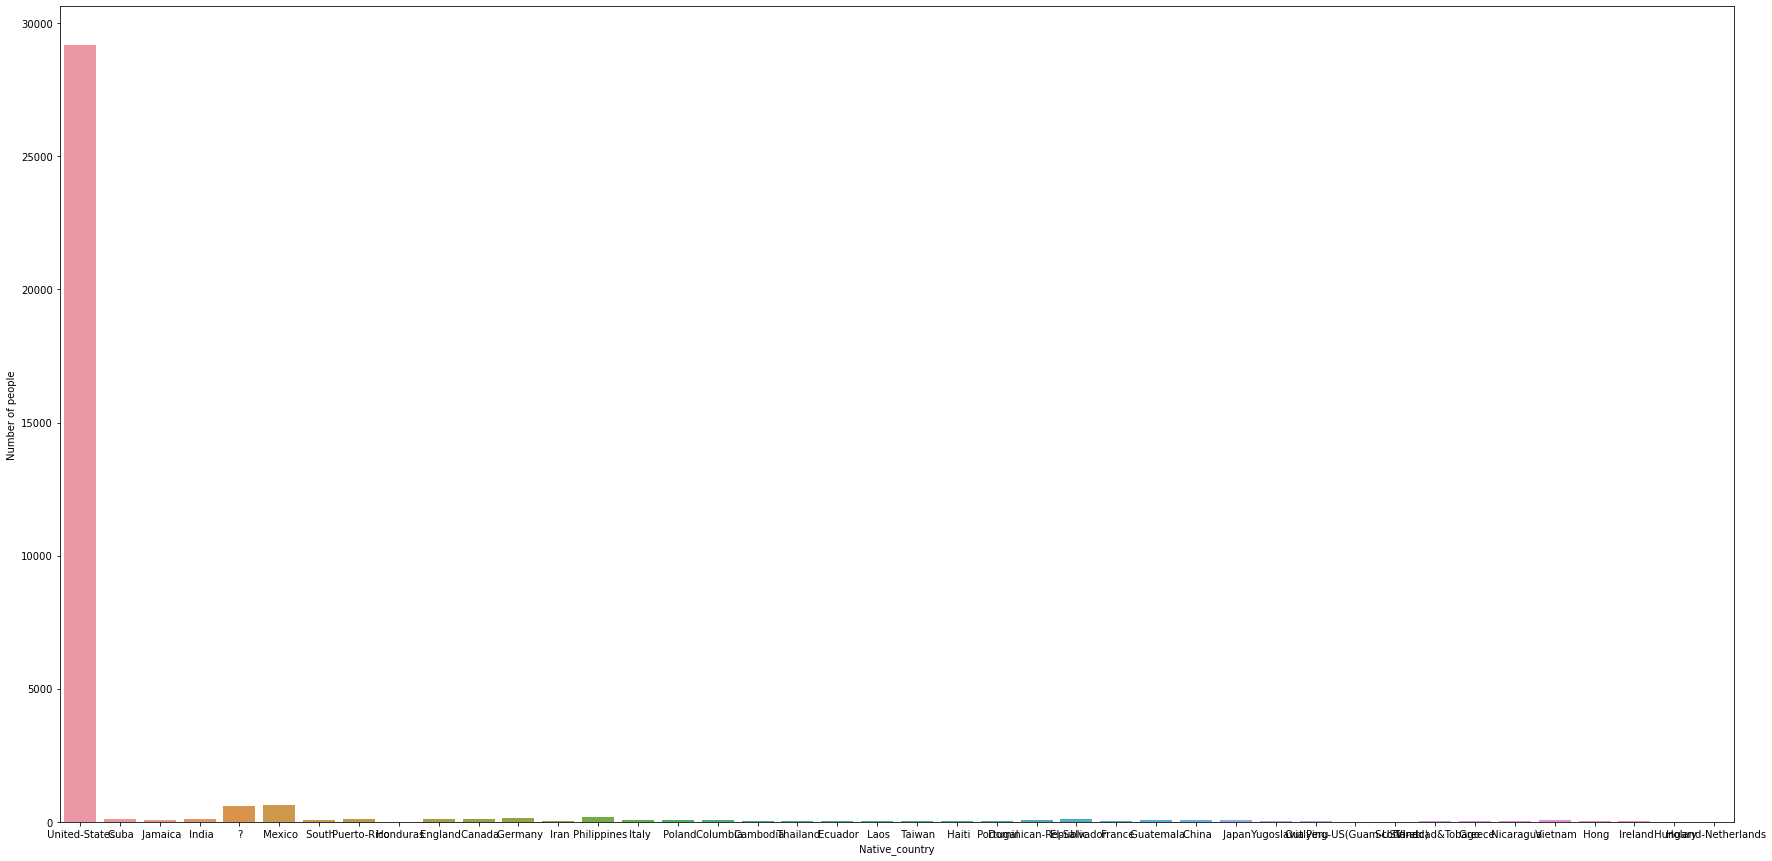

In [42]:
plt.figure(figsize=(30,15))
sns.countplot(df['Native_country'])
plt.ylabel("Number of people")

Most if the people belongs to United States after that Mexico very less people belongs to Holand-Netherlands

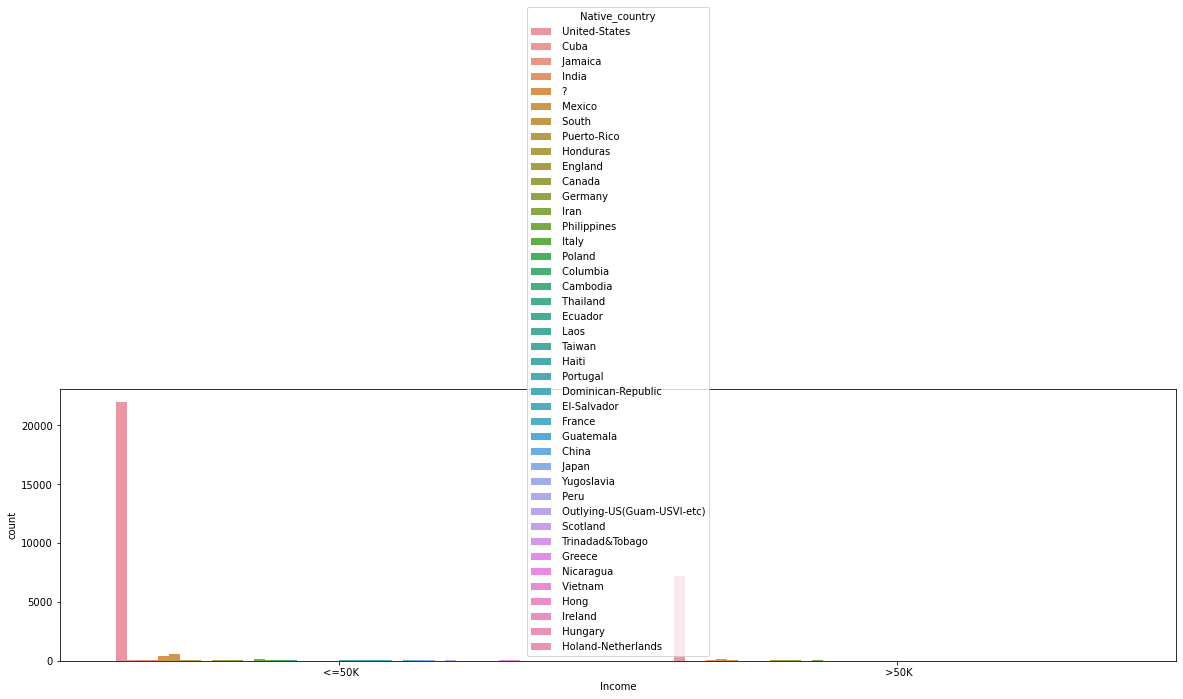

In [43]:
plt.figure(figsize=(20,5))
sns.countplot(x='Income',hue='Native_country',data=df)
plt.show()

Most if the people belongs to United States and their income is <=50k

<AxesSubplot:xlabel='Age', ylabel='Hours_per_week'>

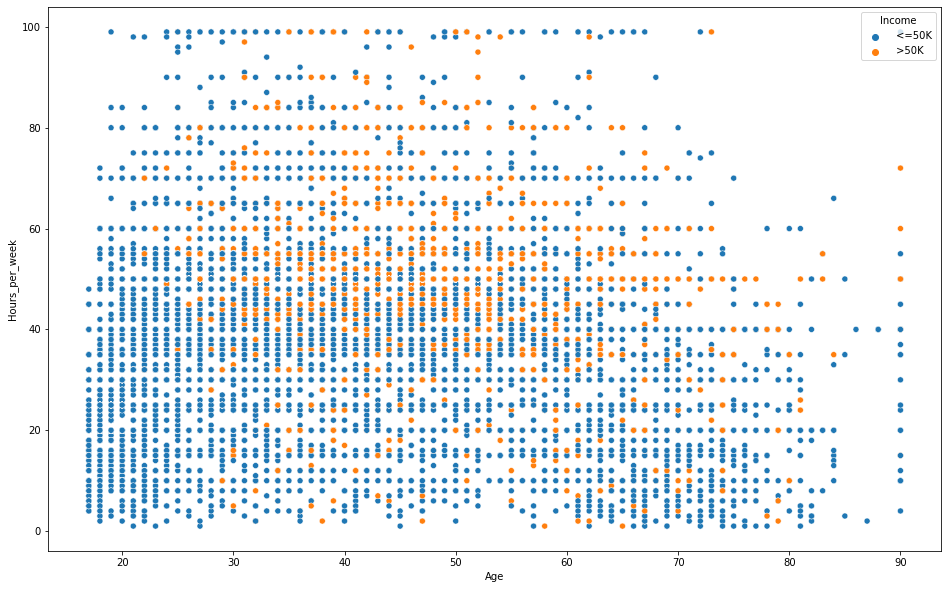

In [44]:
#Plotting relationship between Age and Hours Per Week
plt.figure(figsize=(16,10))
sns.scatterplot(df['Age'],df['Hours_per_week'],hue=df['Income'])

The above plot between age and hours_per_week shows that they are not forming linear correlation with each other all points are scattered on plot. Large density of people are observed between 20 to 40 age.

In [45]:
#Shows all numerical column
numerical=df.select_dtypes(['int64'])

In [46]:
numerical.head()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


#### Plotting Distribution plot for all columns

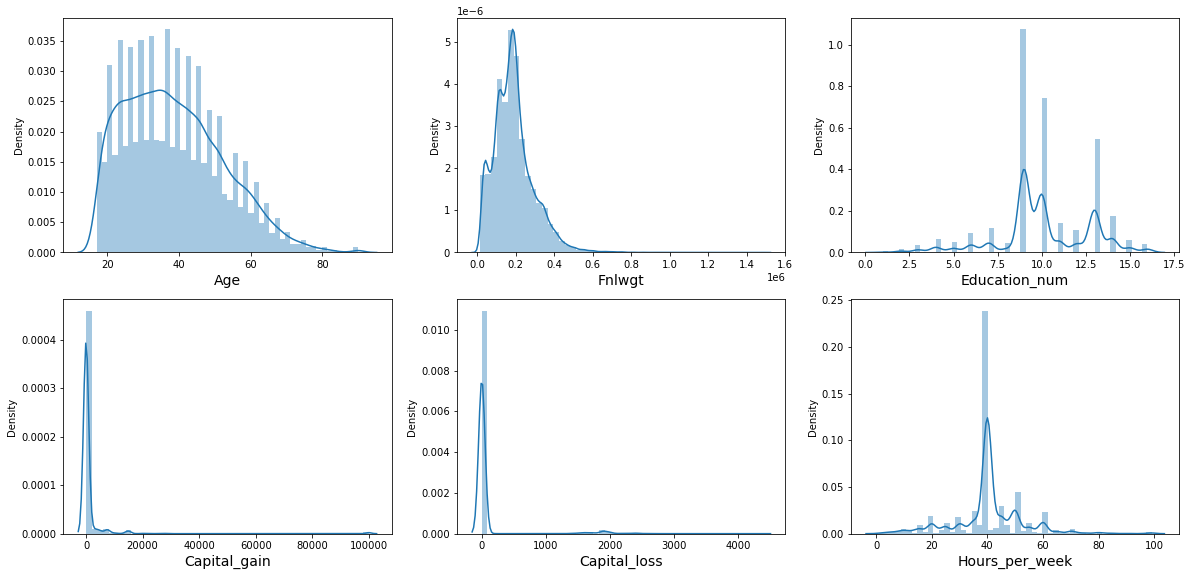

In [47]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical:
    if plotnumber<=6:
        ax=plt.subplot(5,3,plotnumber)
        sns.distplot(numerical[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
plt.show()

Inferences: None of the column are normally distributed at all except the age columns which shows less skewed distribution.

Fnlwgt,Captial_gain,Capital_loss are right skewd from normal distribution.

Hours_per_week and Education_num are shows density at center.

The above plot shows there are outliers present in the dataset.



#### Ploting Box plot for finding outliers

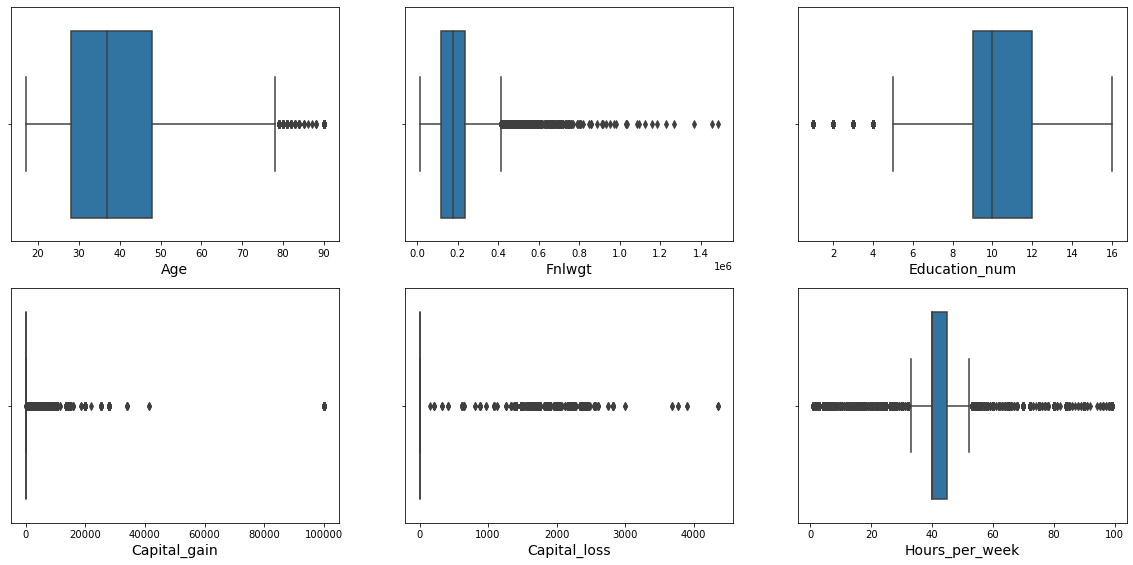

In [48]:
#Plotting Box plot for all columns
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical:
    if plotnumber<=6:
        ax=plt.subplot(5,3,plotnumber)
        sns.boxplot(numerical[column])
        plt.xlabel(column,fontsize=14)
    plotnumber=plotnumber+1
plt.show()

Outlier are present in all columns which we will be need to remove later.

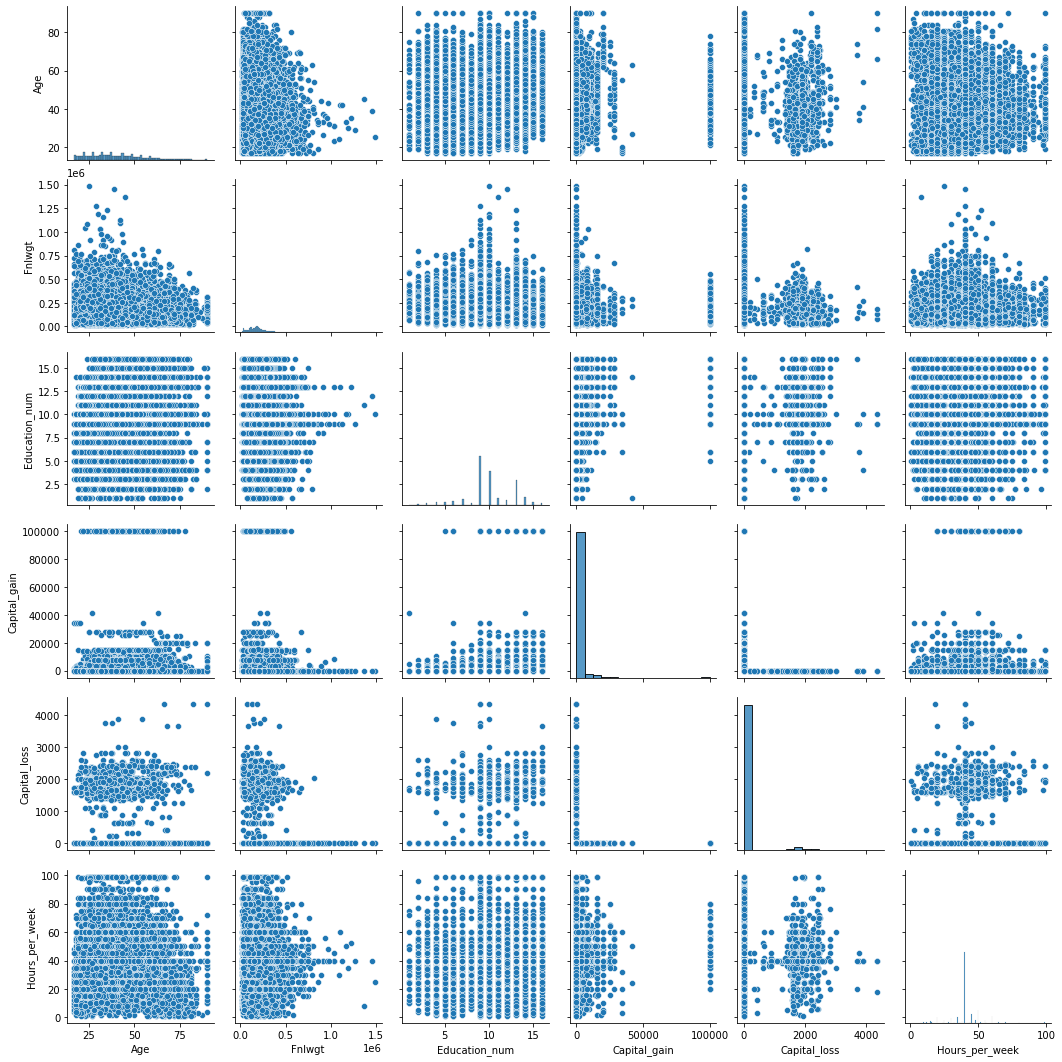

In [49]:
sns.pairplot(df)

Fields Such as : 'Age','Education_num', 'Capital_gain','Capital_loss', 'Hours_per_week' shows some what showing neutral correlation with each other.

In [50]:
# finding correlation coefficient
cor=df.corr()
cor

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

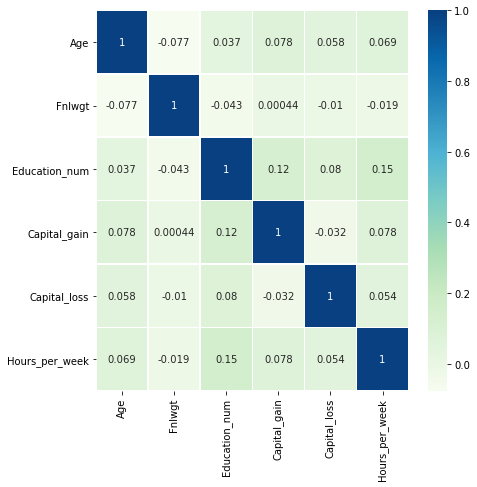

In [51]:
# Plotting heatmap
fig, axis = plt.subplots(figsize=(7, 7))
sns.heatmap(cor,annot=True,linewidths=.5,cmap='GnBu')

From the correlation heatmap, we can see that the target feature 'Income' is highly correlated with Age, numbers of years of education, capital gain and number of hours per week.

There is only 1 field which is negative relationship with all the other fields : 'fnlwgt',it can be removed to increase accuracy of model.



### Data Clenaing
Handling '?' value in dataset 

In [52]:
df.isin([' ?']).sum().sum()

4262

Shows total number of '?' value in whole dataset are 4262.

 

In [53]:
#Replacing with null value
df=df.replace(' ?', np.nan)

In [54]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [55]:
column_nan = ['Workclass', 'Occupation', 'Native_country']

In [56]:
#Replacing the missing values in column_nan with highest frequency count of categories in each class using mode method.
for col in column_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [57]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

### Applying Encoding methods for object datatype

In [58]:
df1 = df.select_dtypes(['object'])
df1.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K


In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtypes == 'object': # encoding all categorical columns
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df1[col])
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [60]:
#Dropping the unencessary columns
df.drop(['Education'],axis=1,inplace=True) #Beacuse education_num represent the same data in numerical format

In [61]:
#Dropping Fnlwgt beacuse it shows negative correlation with all column as well as target variabel
df.drop(['Fnlwgt'],axis=1,inplace=True)

In [62]:
# Now all features are in numerical format 
df.head(2)

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,13,2,3,0,4,1,0,0,13,38,0
1,38,3,9,0,5,1,4,1,0,0,40,38,0


### Removing the Outliers

In [63]:
from scipy.stats import zscore
z=np.abs(zscore(df))
new_df=df[(z<3.57).all(axis=1)]

In [64]:
df.shape

(32560, 13)

In [65]:
new_df.shape

(29579, 13)

In [66]:
# Data loss percentage
# With using z<3 we are lossing nearly 15 percent of data which is feasible.
Data_loss=(new_df.shape[0]-df.shape[0])/df.shape[0]*100
Data_loss

-9.155405405405405

After removing the outliers from the data the shape of the data has change from 32560,13 to 29579,13 which shows that with the z score value less than 3.57 we are able to remove various rows with lossing less than 10 percent of data , Hence our new data shape is (29579,13).



### Splitting dataset into input features and target variables


In [67]:
from sklearn.model_selection import train_test_split
x = new_df.drop(['Income'], axis = 1)
y=new_df["Income"]

### Handling Class Imbalanced problem by oversampling the minority class

In [73]:
from imblearn.over_sampling import SMOTE
SM =SMOTE(0.75)
x_over, y_over = SM.fit_resample(x,y)

In [74]:
y_over.value_counts()

0    22935
1    17201
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

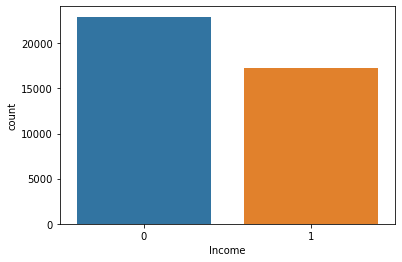

In [75]:
sns.countplot(y_over)

Now 75% of my dataset is balanced.

### Model Building

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score,precision_score,confusion_matrix,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#### Finding the best random state


In [77]:
from sklearn.linear_model import LogisticRegression
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best accuracy is",MaxAccu,'on random state',maxRS)

Best accuracy is 0.7672950751598704 on random state 68


In [78]:
# Splitting the dataset into trianing and testing data
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.25,random_state=maxRS)

In [79]:
#applying Standard Scaler 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

Accuracy score using logistic regression model is 77.09786725134543
Cross validation score 81.90270435862573
-----------------------------
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      5727
           1       0.75      0.70      0.72      4307

    accuracy                           0.77     10034
   macro avg       0.77      0.76      0.76     10034
weighted avg       0.77      0.77      0.77     10034

-----------------------------

 Confusion Matrix


<AxesSubplot:>

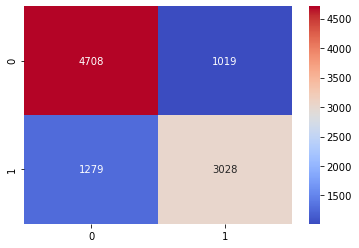

In [81]:
#Using logistic regression 
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
lr_acc=accuracy_score(y_test,pred)
print('Accuracy score using logistic regression model is',lr_acc*100)
lr_cv=cross_val_score(classifier,x,y,cv=5).mean()
print("Cross validation score",lr_cv*100)
print('-----------------------------')
lr_acc1=classification_report(y_test,pred)
print(lr_acc1)
con_mat = confusion_matrix(y_test,pred)
print('-----------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy of Decision Tree classification is  83.86485947777557
Cross validation score 80.70253141044216
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      5727
           1       0.81      0.82      0.81      4307

    accuracy                           0.84     10034
   macro avg       0.84      0.84      0.84     10034
weighted avg       0.84      0.84      0.84     10034


 Confusion Matrix


<AxesSubplot:>

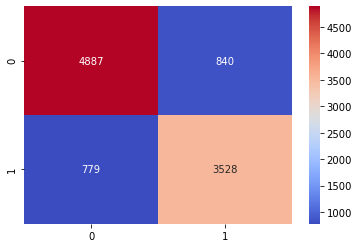

In [82]:
# Using Decision Tree Classification algorithm
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
dtc_acc=accuracy_score(y_test,pred)
print("Accuracy of Decision Tree classification is ",dtc_acc*100)
CV3=cross_val_score(DTC,x,y,cv=5).mean()
print("Cross validation score",CV3*100)
#Printing confusion matrix
con_mat = confusion_matrix(y_test,pred)
dtc_acc1=classification_report(y_test,pred)
print(dtc_acc1)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy score using GuassianNB classifier model is 77.8552920071756
Cross validation score 82.26108317230178
-------------------------------
              precision    recall  f1-score   support

           0       0.77      0.87      0.82      5727
           1       0.79      0.65      0.72      4307

    accuracy                           0.78     10034
   macro avg       0.78      0.76      0.77     10034
weighted avg       0.78      0.78      0.77     10034

-------------------------------

 Confusion Matrix


<AxesSubplot:>

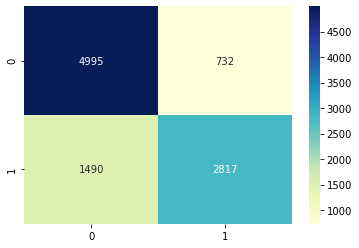

In [83]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)
pred=NB.predict(x_test)
gnb_acc=accuracy_score(y_test,pred)
print('Accuracy score using GuassianNB classifier model is',gnb_acc*100)
gnb_cv=cross_val_score(NB,x,y,cv=5).mean()
print("Cross validation score",gnb_cv*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Accuracy of Random Forest Classificarion is  87.32310145505282
Cross validation score 84.56338528065788
-------------------------------
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5727
           1       0.84      0.87      0.85      4307

    accuracy                           0.87     10034
   macro avg       0.87      0.87      0.87     10034
weighted avg       0.87      0.87      0.87     10034

-------------------------------

 Confusion Matrix


<AxesSubplot:>

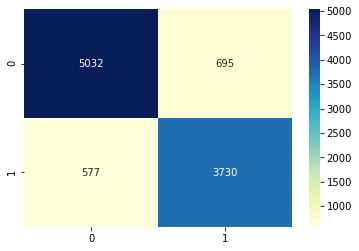

In [84]:
#Using random forest classification
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier() # creating instance of class
RF.fit(x_train,y_train) #Fitting the data
pred=RF.predict(x_test) # Predicting the data 
rfc_acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classificarion is ",rfc_acc*100)
rfc_cv=cross_val_score(RF,x,y,cv=5).mean()
print("Cross validation score",rfc_cv*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [85]:
#Storing the result in pandas dataframe

model=['Logistic Regression','Decision Tree Classifier','GuassianNB Classifier','Random Forest Classifier']

acc=[lr_acc*100,dtc_acc*100,gnb_acc*100,rfc_acc*100]

cv_score=[lr_cv*100,CV3*100,gnb_cv*100,rfc_cv*100]

diff=[cv_score[0]-acc[0],acc[1]-cv_score[1],cv_score[2]-acc[2],acc[3]-cv_score[3]]
diff
result=pd.DataFrame({'Model':model,'Accuracy_score':acc,'Cross Validation_score':cv_score,'Difference':diff})
result

,Model,Accuracy_score,Cross Validation_score,Difference
0,Logistic Regression,77.097867,81.902704,4.804837
1,Decision Tree Classifier,83.864859,80.702531,3.162328
2,GuassianNB Classifier,77.855292,82.261083,4.405791
3,Random Forest Classifier,87.323101,84.563385,2.759716


### Choosing a Model
I am going to choose Random Forest Classifier as my best model because it is giving highest accuracy of nearly 85 percent and showing least cross validation difference.

### Applying hyperparameter tuning to best accuracy model

In [86]:
parameters= {
    'n_estimators': [142,340],
    'max_depth': [30,40],
    'max_features':['auto','sqrt','log2'],
    'criterion':['gini', 'entropy'],
    }

In [87]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [142, 340]})

In [88]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'max_features': 'sqrt',
 'n_estimators': 340}

Accuracy of the model using Random Forest classifier is  87.56228822005183
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      5727
           1       0.84      0.88      0.86      4307

    accuracy                           0.88     10034
   macro avg       0.87      0.88      0.87     10034
weighted avg       0.88      0.88      0.88     10034

-------------------------------

 Confusion Matrix


<AxesSubplot:>

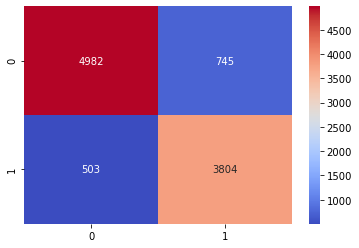

In [89]:
#Final Model
Final_model=RandomForestClassifier(n_estimators=340,criterion='gini',max_features='sqrt',max_depth=30,random_state=68)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc_final=accuracy_score(y_test,pred)
print("Accuracy of the model using Random Forest classifier is ",acc_final*100)
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

### Plotting Roc curve and roc_auc value for predcited probabalities

In [90]:
#Receiver operator charactersitics(ROC)
fpr,tpr,thresholds=roc_curve(y_test,pred)

In [93]:
#False positive rate
print('False positive rate-',fpr)

# True positive rate
print('True positive rate-',tpr)

print('Thresholds-',thresholds)

False positive rate- [0.         0.13008556 1.        ]
True positive rate- [0.         0.88321337 1.        ]
Thresholds- [2 1 0]


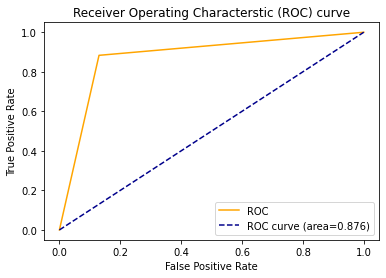

In [94]:
plt.plot(fpr,tpr,color='orange',label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve (area=%0.3f)'% acc_final)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstic (ROC) curve')
plt.legend()
plt.show()

### Conclusion

1- In this project, we build various models like logistic regression, decision tree classifier, random forest classifier and    GuassianNB classifier.

2- Random forest classifier gave highest accuracy of 87.56 percent and F1 score of 88.



### Saving the Model

In [95]:
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib

In [96]:
joblib.dump(Final_model,'Final_Model.pkl')

['Final_Model.pkl']